<a href="https://colab.research.google.com/gist/allanaasilva/fa5285f6aa6dba138f5f9a5aedf73c04/tp4_allana_alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tema:** Regressão
### **Base de dados:** https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

from warnings import filterwarnings
filterwarnings('ignore')


##**2. Data understanding (Entendimento dos dados)**


In [ ]:
#Carregando a base de dados
file = ('sample_data/insurance.csv')  
df = pd.read_csv(file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
mean_charges=df.groupby('sex',as_index=False)['charges'].mean().sort_values(by='charges',ascending=False)
mean_charges['charges']=round(mean_charges['charges'],2)
fig=px.bar(mean_charges,x='sex',y='charges',color='sex',labels={'sex':'Sexo','charges':'Valor Cobrado'},text='charges',template='seaborn',title='<b> Média de Gastos por Sexo')
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
mean_charges_smoker=df.groupby('smoker',as_index=False)['charges'].mean().sort_values(by='charges',ascending=False)
mean_charges_smoker['charges']=round(mean_charges_smoker['charges'],2)
fig=px.bar(mean_charges_smoker,x='smoker',y='charges',color='smoker',labels={'smoker':'Fumante','charges':'Valor Cobrado'},text='charges',template='seaborn',title='<b> Média de Gastos por Grupo de Fumantes e Não Fumantes')
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
mean_charges_region=df.groupby('region',as_index=False)['charges'].mean().sort_values(by='charges',ascending=False)
mean_charges_region['charges']=round(mean_charges_region['charges'],2)
fig=px.bar(mean_charges_region,x='region',y='charges',color='region',labels={'region':'Região','charges':'Valor Cobrado'},text='charges',template='seaborn',title='<b> Média de Gastos por Região')
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
mean_charges_children=df.groupby('children',as_index=False)['charges'].mean().sort_values(by='charges',ascending=False)
mean_charges_children['charges']=round(mean_charges_children['charges'],2)
fig=px.bar(mean_charges_children,x='children',y='charges',color='children',labels={'children':'Número de Dependentes','charges':'Valor Cobrado'},text='charges',template='seaborn',title='<b> Média de Gastos por Número de Dependentes')
fig.update_traces(textfont_size=8)
fig.show()

In [ ]:
fig=px.box(df,y='age',template='ggplot2',labels={'age':'Idade'},title='<b> Idade das Pessoas da Amostra')
fig.update_xaxes(visible=False)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(df, x="age", y="charges")
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(df, x="bmi", y="charges")
fig.show(renderer="colab")

##**3. Data preparation (Preparação dos dados)**

As únicas alterações feitas se referem a adequação das variáveis categóricas e ao dimensionamento das variáveis para o intervalo de [0, 1].

In [ ]:
x=df.drop(['charges'], axis=1)
y=df['charges']

colunas_categoricas = ['sex','children',	'smoker', 'region']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')

df_one_hot_enc = one_hot_enc.fit_transform(x)
df_one_hot_enc = pd.DataFrame(df_one_hot_enc, columns=one_hot_enc.get_feature_names_out())

scaler = MinMaxScaler()
scaler.fit(df_one_hot_enc)
scale = scaler.transform(df_one_hot_enc)
x = pd.DataFrame(scale, columns=df_one_hot_enc.columns)
x.head()

,onehotencoder__sex_female,onehotencoder__sex_male,onehotencoder__children_0,onehotencoder__children_1,onehotencoder__children_2,onehotencoder__children_3,onehotencoder__children_4,onehotencoder__children_5,onehotencoder__smoker_no,onehotencoder__smoker_yes,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,remainder__age,remainder__bmi
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.021739,0.321227
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.479150
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.217391,0.458434
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.326087,0.181464
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.304348,0.347592


##**4. Modeling (Modelagem)**

Serão testados na etapa de modelagem o SVM, o Random Forest e a regressão polinomial.

Primeiramente, será usado o conjunto de validação para escolha dos parâmetros para o SVM.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state= 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state= 42)

parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1,5,10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x_val,y_val)
clf.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1e-07, 'kernel': 'linear'}

SVM com parâmetros selecionados:

In [ ]:
svmregression = SVR(C = 10, epsilon = 0.5, gamma = 1e-07, kernel = 'linear') 
svm = svmregression.fit(x_train, y_train)

Escolha dos parâmetros para o Random Forest, usando o conjunto de validação:

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


grid_search.fit(x_val, y_val)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

Treino do Random Forest com os parâmetros escolhidos:

In [ ]:
RandomForest = RandomForestRegressor(n_estimators = 300, max_features = 3, max_depth = 100, min_samples_split = 8,
                           min_samples_leaf = 3, random_state = 42).fit(x_train, y_train)

Escolha do grau do polinômio para regressão polinomial:

In [ ]:
rmses = []
degrees = np.arange(1, 5)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    x_poly_val = poly_features.fit_transform(x_val)
    poly_predict = poly_reg.predict(x_poly_val)
    poly_mse = mean_absolute_error(y_val, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

print('Melhor grau: {} com MAE {}'.format(min_deg, min_rmse))

Melhor grau: 1 com MAE 63.555842242534204


Como o grau cujo menor erro médio absoluto foi o 1, a regressão linear será ajustada:

In [ ]:
LinearRegression = LinearRegression().fit(x_train, y_train)

##**5. Evaluation (Validação)**


In [ ]:
ysvm = svm.predict(x_test)
ysvm = pd.DataFrame(ysvm, index=x_test.index, columns=['Prediction'])

yrf = RandomForest.predict(x_test)
yrf = pd.DataFrame(yrf, index=x_test.index, columns=['Prediction'])

ylr = LinearRegression.predict(x_test)
ylr = pd.DataFrame(ylr, index=x_test.index, columns=['Prediction'])

Verificação do erro médio absoluto de cada modelo:

In [ ]:
score_svm = mean_absolute_error(y_test, ysvm["Prediction"])
score_rf = mean_absolute_error(y_test, yrf["Prediction"])
score_lr = mean_absolute_error(y_test, ylr["Prediction"])
print("MAE do SVM é: {}".format(round(score_svm, 2)))
print("MAE do Random Forest é: {}".format(round(score_rf, 2)))
print("MAE da Regressão Linear é: {}".format(round(score_lr, 2)))

MAE do SVM é: 7702.6
MAE do Random Forest é: 3265.64
MAE da Regressão Linear é: 4201.49


O menor erro foi o obtido com o Random Forest.

In [ ]:
yrf['Actual']=y_test

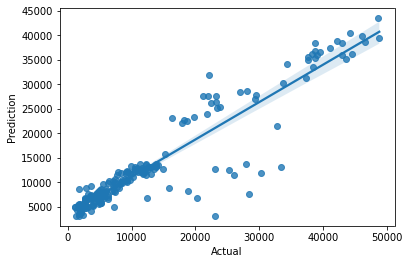

In [ ]:
sns.regplot(x='Actual', y='Prediction', data=yrf)

Resíduos:

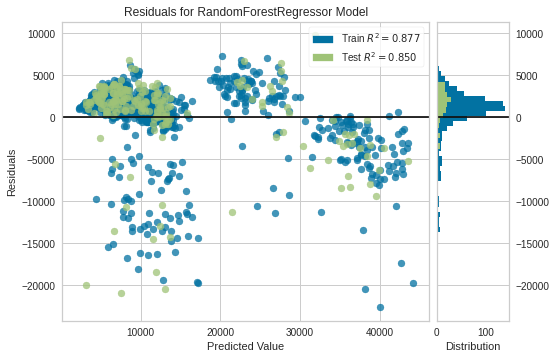

In [ ]:
visualizer = ResidualsPlot(RandomForest)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test) 
visualizer.show()

Mais comentários a respeito dos resultados obtidos estão no relatório final.